<a href="https://colab.research.google.com/github/chuancao26/islp/blob/main/ISLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=7e556e0b64c77cd540fae7bb28980baf0081a7b1a8cf3447402df588eaea2ff9
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

from ISLP import load_data
from ISLP.models import ModelSpec as MS, poly
from ISLP.models import ModelSpec as MS, poly

from sklearn.model_selection import train_test_split
b0 = 50
b1 = 20
b2 = 0.07
b3 = 35
b4 = 0.01
b5 = -10

arr = np.array([b0, b1, b2, b3, b4, b5])
val = np.array([1, 4, 110, 1, 4 * 110, 1 * 4])
np.sum(arr * val)

np.float64(137.1)

# Pregunta 4, comparacion de modelos con diferentes tipos de regresion


In [ ]:
m

In [ ]:
#Generando al data
np.random.seed(7)
n = 10000
x = np.linspace(0, 100, n)
intercepto_real = 10
pendiente_real = 7
y = intercepto_real + pendiente_real * x + np.random.normal(0, 100, n)

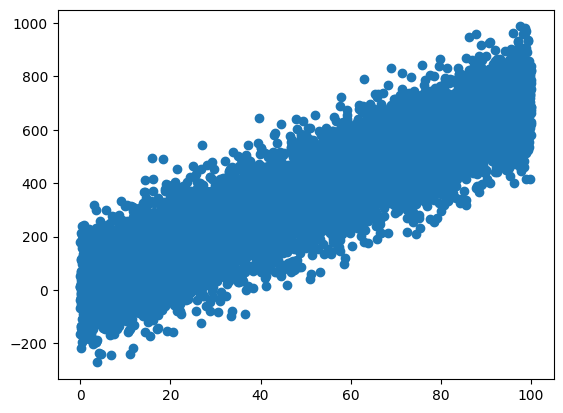

In [ ]:
# graficando
plt.scatter(x, y)

In [ ]:
data = pd.DataFrame({"x": x, "y": y})

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
train_data.columns

Index(['x', 'y'], dtype='object')

In [ ]:

# Datos lineales (relación verdadera lineal)
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 + 2* x + 3*x ** 2 + np.random.normal(0, 3, 100)
data = pd.DataFrame({"x": x, "y": y})

# División train/test
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Tres diseños: lineal, cuadrático y cúbico
designs = [
    MS(['x']),
    MS([poly("x", degree=2)]),
    MS([poly("x", degree=3)])
]

for ms in designs:
    # Ajustar con train
    X_train = ms.fit_transform(train_data)
    model = sm.OLS(train_data["y"], X_train).fit()

    # Transformar test
    X_test = ms.transform(test_data)
    pred = model.predict(X_test)

    RSS = np.sum((pred - test_data["y"]) ** 2)
    print(f"{ms}:")
    print(f"  Train R² = {model.rsquared:.4f}")
    print(f"  Test RSS = {RSS:.4f}\n")

ModelSpec(terms=['x']):
  Train R² = 0.9287
  Test RSS = 15922.2816

ModelSpec(terms=[Feature(variables=('x',), name='poly(x, degree=2)', encoder=Poly(degree=2), use_transform=True, pure_columns=False, override_encoder_colnames=True)]):
  Train R² = 0.9991
  Test RSS = 231.3026

ModelSpec(terms=[Feature(variables=('x',), name='poly(x, degree=3)', encoder=Poly(degree=3), use_transform=True, pure_columns=False, override_encoder_colnames=True)]):
  Train R² = 0.9991
  Test RSS = 235.9498



Comparación de modelos:

Modelo       RSS_train    RSS_test    R2_train     R2_test
Grado 1         231.89       94.38       0.916       0.908
Grado 2         231.75       93.69       0.916       0.908
Grado 3         220.48       88.99       0.921       0.913


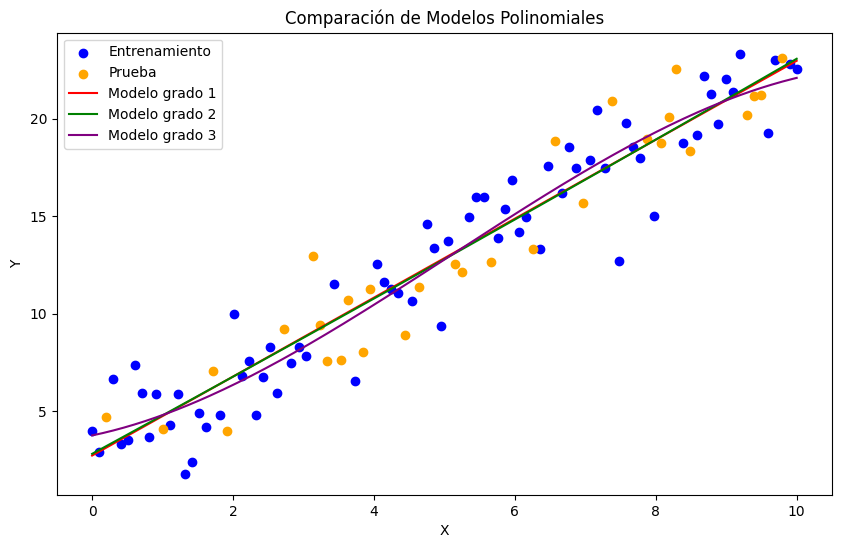

In [ ]:
# ============================================
# 📊 Comparación de modelos: lineal, cuadrático y cúbico
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# -----------------------------
# 1️⃣ Generar datos simulados
# -----------------------------
np.random.seed(42)
n = 100
X = np.linspace(0, 10, n).reshape(-1, 1)

# Relación REAL: lineal
y_true = 3 + 2 * X.flatten() + np.random.normal(0, 2, n)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=1)

# -----------------------------
# 2️⃣ Función para ajustar modelo polinomial
# -----------------------------
def fit_poly_model(degree, X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)

    RSS_train = np.sum((y_train - y_pred_train)**2)
    RSS_test = np.sum((y_test - y_pred_test)**2)
    R2_train = r2_score(y_train, y_pred_train)
    R2_test = r2_score(y_test, y_pred_test)

    return model, RSS_train, RSS_test, R2_train, R2_test

# -----------------------------
# 3️⃣ Ajustar modelos
# -----------------------------
degrees = [1, 2, 3]
results = {}

for d in degrees:
    model, RSS_train, RSS_test, R2_train, R2_test = fit_poly_model(d, X_train, y_train, X_test, y_test)
    results[d] = (RSS_train, RSS_test, R2_train, R2_test)

# -----------------------------
# 4️⃣ Mostrar resultados
# -----------------------------
print("Comparación de modelos:\n")
print(f"{'Modelo':<10}{'RSS_train':>12}{'RSS_test':>12}{'R2_train':>12}{'R2_test':>12}")
for d in degrees:
    RSS_train, RSS_test, R2_train, R2_test = results[d]
    print(f"{'Grado '+str(d):<10}{RSS_train:>12.2f}{RSS_test:>12.2f}{R2_train:>12.3f}{R2_test:>12.3f}")

# -----------------------------
# 5️⃣ Visualización
# -----------------------------
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color="blue", label="Entrenamiento")
plt.scatter(X_test, y_test, color="orange", label="Prueba")

colors = ["red", "green", "purple"]
for d, color in zip(degrees, colors):
    poly = PolynomialFeatures(d)
    X_plot_poly = poly.fit_transform(X_plot)
    y_plot = LinearRegression().fit(poly.fit_transform(X_train), y_train).predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color=color, label=f"Modelo grado {d}")

plt.title("Comparación de Modelos Polinomiales")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


# Applied Part

## Ejercicio 8

### Cargado de datos

In [ ]:
auto = load_data("Auto")

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


### matrz de caracteristicas X

In [ ]:
X = auto["horsepower"]
Y = auto["mpg"]

In [ ]:
lineal_design = MS(["horsepower"])
lineal_design = lineal_design.fit(auto)
train_x = lineal_design.transform(auto)
train_x

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150
ford torino,1.0,140
...,...,...
ford mustang gl,1.0,86
vw pickup,1.0,52
dodge rampage,1.0,84


### aplicacion del modelo de regresion lineal

In [ ]:
model = sm.OLS(Y, train_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        16:48:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ploteo de la relacion

In [ ]:
def line(ax, slope, intercept):
  xlim = ax.get_xlim()
  ylim = [slope * xlim[0] + intercept, slope * xlim[1] + intercept]
  ax.plot(xlim, ylim, color="black")


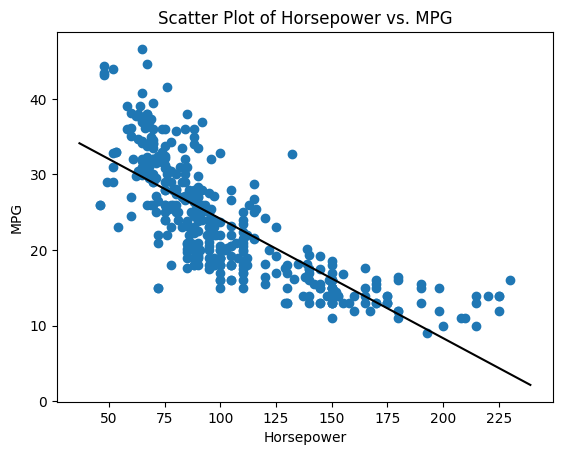

In [ ]:
fig, ax = plt.subplots()

ax.scatter(train_x["horsepower"], Y)
line(ax, model.params["horsepower"], model.params["intercept"])
plt.title("Scatter Plot of Horsepower vs. MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

### modelo polinomio de grado 2

In [ ]:
design = MS([poly("horsepower", degree=2)])
design = design.fit(auto)
train_x = design.transform(auto)
model2 = sm.OLS(Y, train_x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           5.40e-99
Time:                        16:48:25   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        23.4459      0.221    106.130      0.000      23.012      23.880
poly(horsepower, degree=2)[0]  -120.1377      4.374    -27.467      0.000    -128.737    -111.538
poly(horsepower, degree=2)[1]    44.0895      4.374     10.080      0.000      35.490      52.689
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_x = np.arange(X.min(), X.max(), 10)
pred_x = pd.DataFrame({"horsepower": pred_x})
new_data_x = design.transform(pred_x)
new_data_x

,intercept,"poly(horsepower, degree=2)[0]","poly(horsepower, degree=2)[1]"
0,1.0,-0.076821,0.122119
1,1.0,-0.063682,0.080651
2,1.0,-0.050544,0.044766
3,1.0,-0.037405,0.014462
4,1.0,-0.024266,-0.010260
5,1.0,-0.011128,-0.029400
6,1.0,0.002011,-0.042958
7,1.0,0.015150,-0.050934
8,1.0,0.028288,-0.053328
9,1.0,0.041427,-0.050141


In [ ]:
predicted_y = model2.predict(new_data_x)
predicted_y

,0
0,38.059191
1,34.652442
2,31.491799
3,28.577264
4,25.908837
5,23.486516
6,21.310303
7,19.380196
8,17.696197
9,16.258306


Text(0.5, 1.0, 'Scatter Plot of Horsepower vs. MPG')

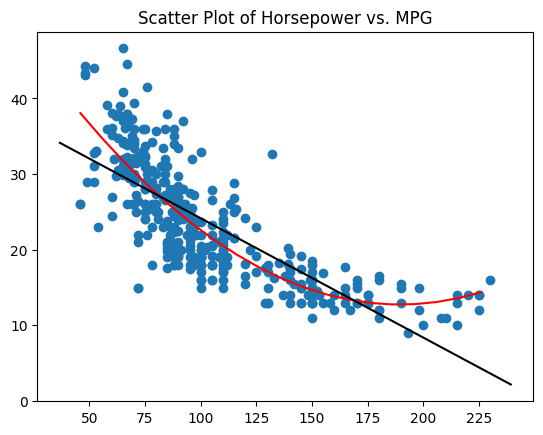

In [ ]:
# Graficando las predicciones que es ppolinomio de grado 2
fig, ax = plt.subplots()
ax.scatter(auto["horsepower"], Y)
ax.plot(pred_x, predicted_y, color="red")
line(ax, model.params["horsepower"], model.params["intercept"])
plt.title("Scatter Plot of Horsepower vs. MPG")

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           5.40e-99
Time:                        16:49:18   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        23.4459      0.221    106.130      0.000      23.012      23.880
poly(horsepower, degree=2)[0]  -120.1377      4.374    -27.467      0.000    -128.737    -111.538
poly(horsepower, degree=2)[1]    44.0895      4.374     10.080      0.000      35.490      52.689
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        16:49:20   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Respuetas


#### (a)

i) si existe relacion significativa entre el preductor "Horsepower" y la repuesta que es "mpg".

ii) con un valor de 0.606 de r2 podemos decir que la relacion es relativamente fuerte. Sin embargo el modelo no es bueno debido a que graficamente los datos siguen una forma mas compleja.

iii) la relacion es positiva entre las variables, por cada incremento de 1 unidad en el "horsepower" tendremos una respuesta positiva de 39 unidades mas en la variable dependiente "mpg"

In [ ]:
# iv
new_data = pd.DataFrame({"horsepower": [98]})
point = lineal_design.transform(new_data)
model.predict(point)


,0
0,24.467077


#### b)

#### calculando los residuos


In [ ]:
model.fittedvalues

,0
name,
chevrolet chevelle malibu,19.416046
buick skylark 320,13.891480
plymouth satellite,16.259151
amc rebel sst,16.259151
ford torino,17.837598
...,...
ford mustang gl,26.361214
vw pickup,31.727935
dodge rampage,26.676903


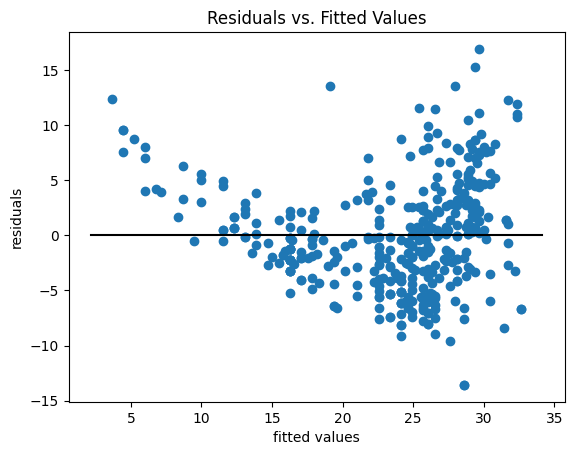

In [ ]:
fig, ax = plt.subplots()
ax.scatter(model.fittedvalues, model.resid)
ax.plot(ax.get_xlim(), [0, 0], color="black")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

podemos apreciar que los errores a simple vista tienen una tendencia a patron. Para lo cual haremos una revision con la regresion los fitted values y la respuesta de los residuals. Nuestro objetivo es verificar si existe o no linealidad en el modelo.

#### ajustando la linea de regresion de los fitted values con lkos residuals

In [ ]:
data = pd.DataFrame({"resid": model2.resid,
                     "fitted": model2.fittedvalues})
resid_design = MS([poly("fitted", degree=2)])
resid_design = resid_design.fit(data)
train_x = resid_design.transform(data)
model3 = sm.OLS(model.resid, train_x).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     25.68
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           3.34e-11
Time:                        16:49:33   Log-Likelihood:                -1154.4
No. Observations:                 392   AIC:                             2315.
Df Residuals:                     389   BIC:                             2327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                 -1.991e-14      0.233  -8.54e-14      1.000      -0.458       0.458
poly(fitted, degree=2)[0]    15.1899      4.617      3.290      0.001       6.113      24.267
poly(fitted, degree=2)[1]    29.3938      4.617      6.367      0.000      20.317      38.471
==============================================================================
Omnibus:                       13.055   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.299
Skew:                           0.235   Prob(JB):                     3.91e-05
Kurtosis:                       4.011   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data_fitted = np.arange(model2.fittedvalues.min(), model2.fittedvalues.max(), 1)
data_fitted = pd.DataFrame({"fitted": data_fitted})
new_data_fitted = resid_design.transform(data_fitted)
predicted_resid = model3.predict(new_data_fitted)

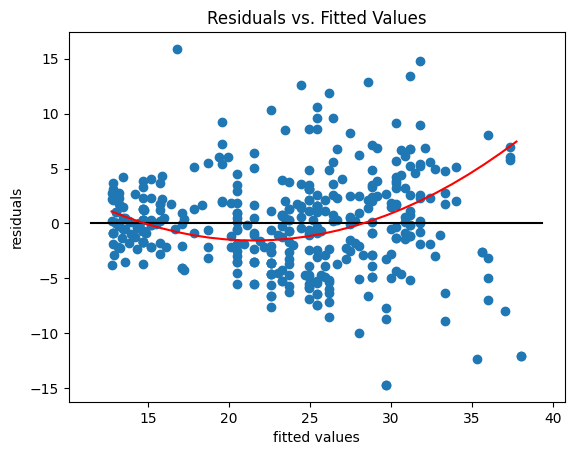

In [ ]:
fig, ax = plt.subplots()
ax.scatter(model2.fittedvalues, model2.resid)
ax.plot(ax.get_xlim(), [0, 0], color="black")
ax.plot(data_fitted, predicted_resid, color="red")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

Con el grafico de los residuos podemos decir que el modelo mejora debido a que existe una relacion no lineal entre los datos. con esto podemos decir que el modelo cuadratico mejora las mediciones del modelo.

## pregunta 9

In [4]:
auto = load_data("Auto")

In [55]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


In [5]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [6]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

### A)


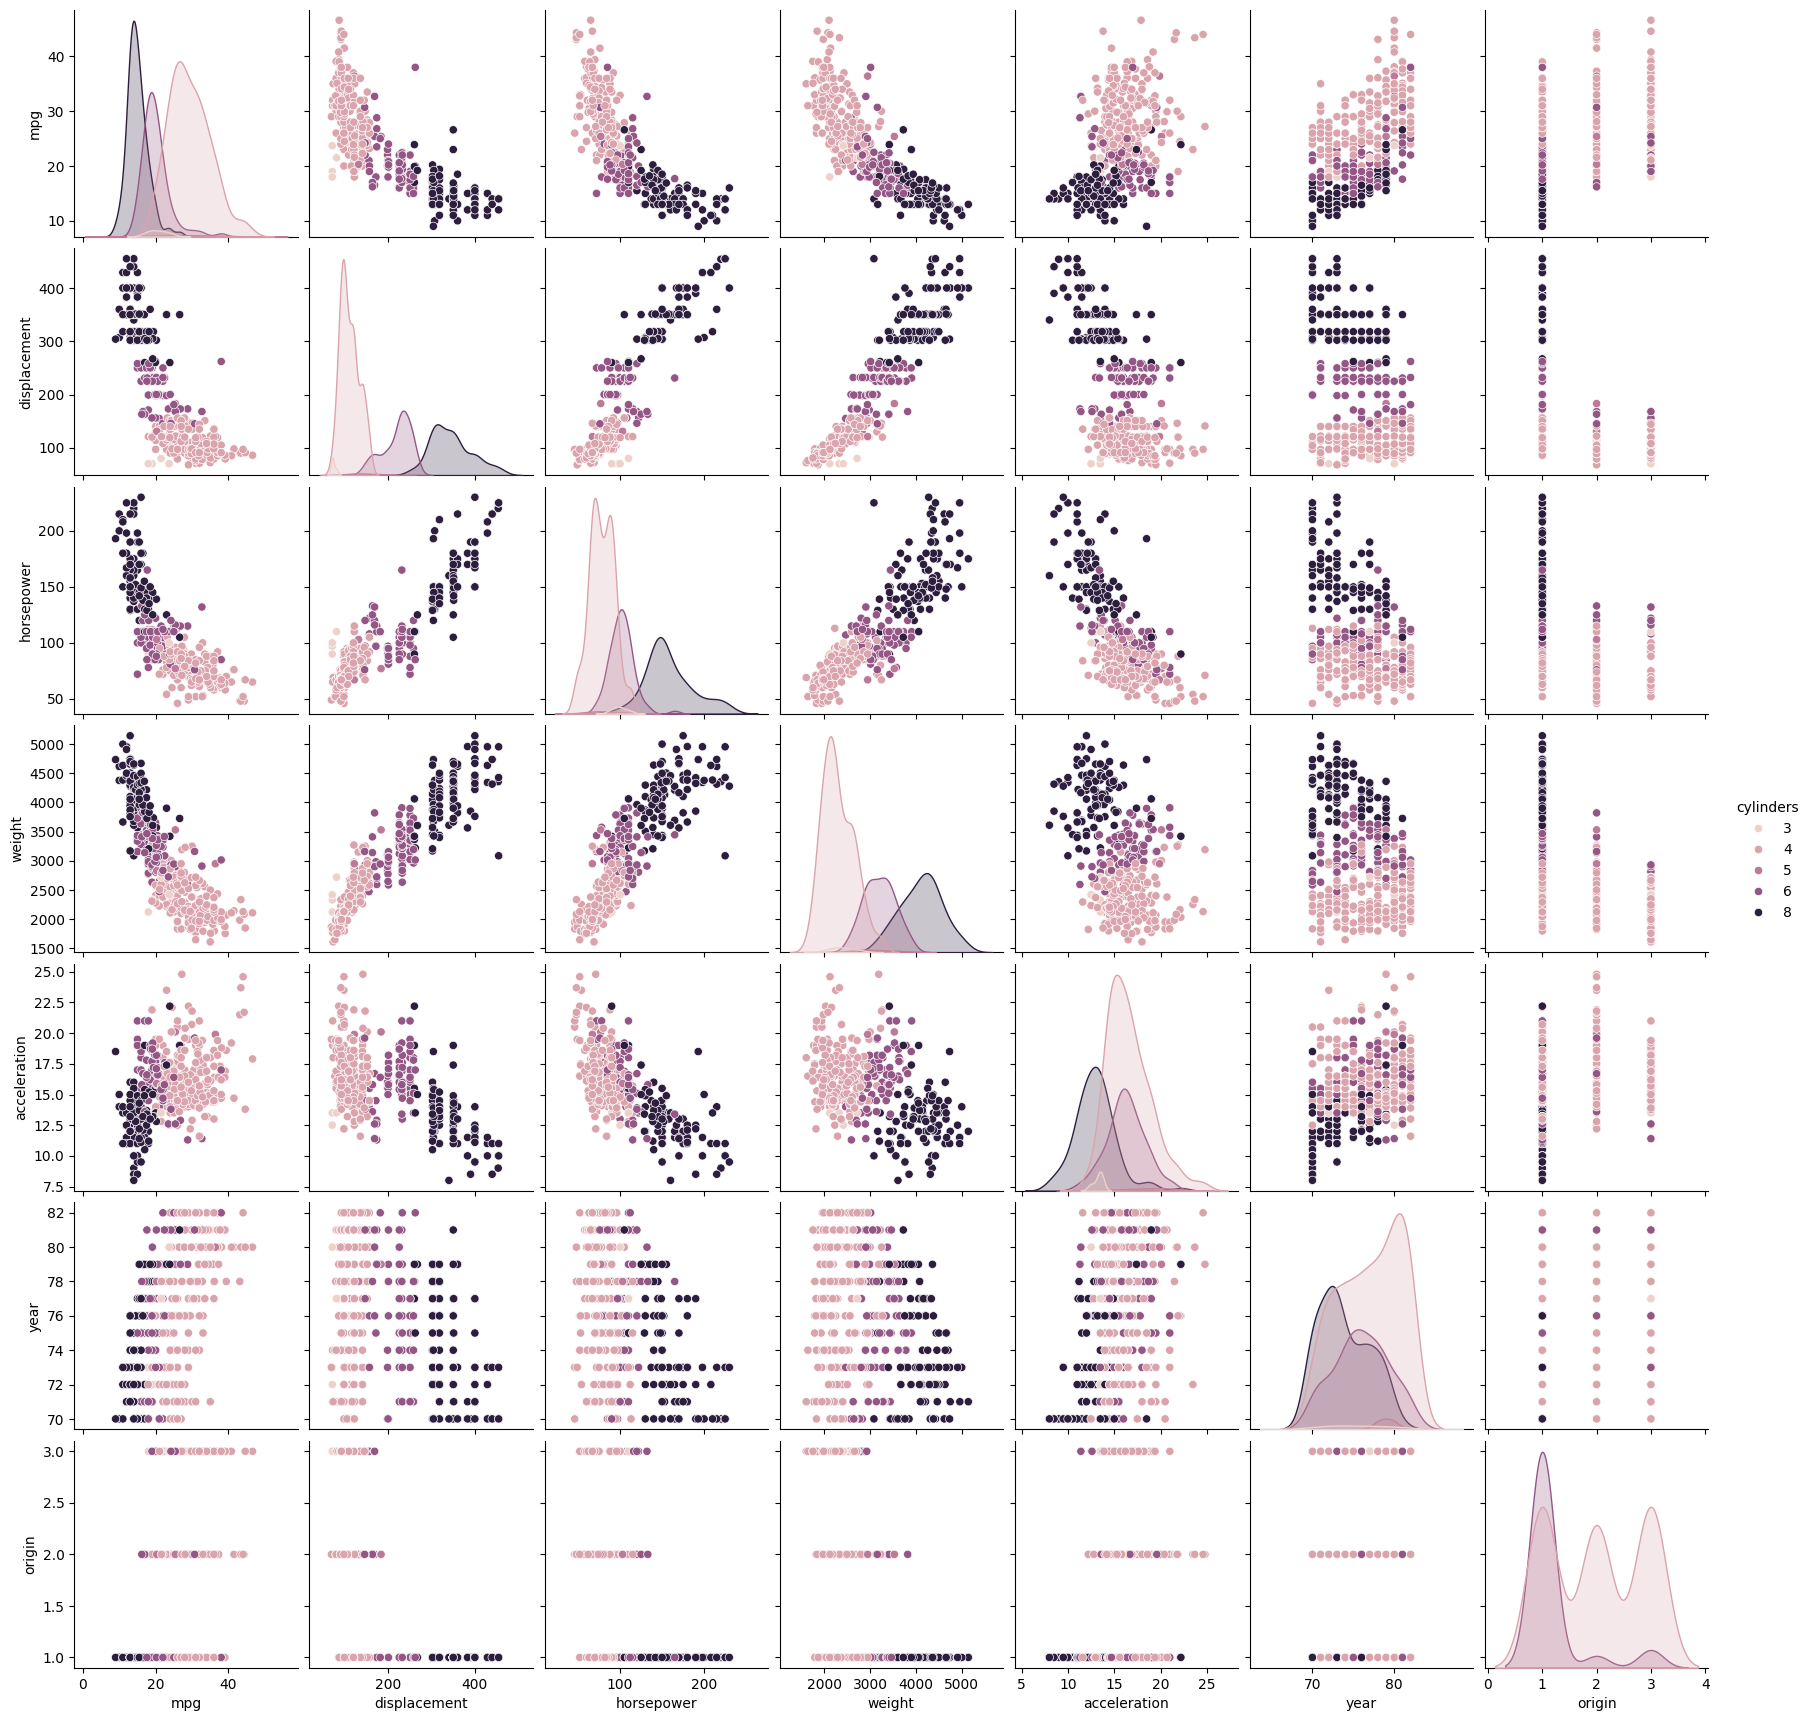

In [7]:
import seaborn as sns
sns.pairplot(auto, hue="cylinders")

### B)

In [ ]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [62]:
X = auto[auto.columns.drop("mpg")]
y = auto["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.shape

(313, 7)

### analisis de variables (cylinder)

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 35.7+ KB


In [12]:
auto.origin.value_counts()


,count
origin,
1,245
3,79
2,68


In [11]:
auto["cylinders"].value_counts()

,count
cylinders,
4,199
8,103
6,83
3,4
5,3


In [ ]:
auto.nunique()

,0
mpg,127
cylinders,5
displacement,81
horsepower,93
weight,346
acceleration,95
year,13
origin,3


In [57]:
cat_var = ["origin"]
X_train = pd.get_dummies(X_train, columns=cat_var, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_var, drop_first=True)
X_train = X_train.astype(float)
y_train = y_train.astype(float)


In [58]:
# adding intercePT
X_train = sm.add_constant(X_train)
X_test= sm.add_constant(X_test)

In [59]:
model_multiple = sm.OLS(y_train, X_train).fit()
print(model_multiple.summary())
#

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          1.20e-111
Time:                        23:39:28   Log-Likelihood:                -816.67
No. Observations:                 313   AIC:                             1651.
Df Residuals:                     304   BIC:                             1685.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.3319      5.446     -3.550   

### analizando colinealidad

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# X = tus variables independientes (sin la dependiente)
X = X_train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin_2', 'origin_3']]
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Variable         VIF
0         const  834.069241
1     cylinders   11.121111
2  displacement   22.553848
3    horsepower    9.930451
4        weight   10.486526
5  acceleration    2.682995
6          year    1.348005
7      origin_2    1.571200
8      origin_3    1.736818


In [39]:
# eliminando variables repetidas que p=roducen alto VIF
colineales = ["horsepower", "cylinders", "displacement"]
X_train = X_train.drop(colineales, axis=1)
X_test = X_test.drop(colineales, axis=1)

In [41]:
X_train.corr()

,const,weight,acceleration,year,origin_2,origin_3
const,NaN,NaN,NaN,NaN,NaN,NaN
weight,NaN,1.000000,-0.392906,-0.328623,-0.257206,-0.466682
acceleration,NaN,-0.392906,1.000000,0.302437,0.183057,0.133746
year,NaN,-0.328623,0.302437,1.000000,-0.048850,0.191089
origin_2,NaN,-0.257206,0.183057,-0.048850,1.000000,-0.213648
origin_3,NaN,-0.466682,0.133746,0.191089,-0.213648,1.000000


In [42]:
X_train = X_train.drop("weight", axis=1)
X_test = X_test.drop("weight", axis=1)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

X = X_train.copy()
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Variable         VIF
0         const  457.074760
1  acceleration    1.170162
2          year    1.135867
3      origin_2    1.106713
4      origin_3    1.103708


In [43]:
import statsmodels.api as sm

model_multiple = sm.OLS(y_train, X_train).fit()
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           1.64e-62
Time:                        23:29:42   Log-Likelihood:                -943.57
No. Observations:                 313   AIC:                             1897.
Df Residuals:                     308   BIC:                             1916.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6168      6.008    -10.922   

#### Anova

In [24]:
from statsmodels.stats.anova import anova_lm

anova_lm(model_multiple, type=2)

AttributeError: 'PandasData' object has no attribute 'design_info'

i) si hay relacion entre todas las variables tomadas en cuenta dado que los valores de p son menos a 0.05 que es nuestro nivel de signoficancia.

ii) los predictors que son significativos estadsiticamente dado su nivel de significancia en 0.05 y un valor de p menor a este son:
- displacement
- weight
- year
- origin

iii) Nos dice que mientras mas reciente sea el auto, tendremos un valor mas alto de los mpg. exactamnente por cada 1 unidad de cambio en year, habra unincremento de 0.75 en el mpg manteniendo a los demas factores constantes.

### d)Graficos de diagnistico

<Axes: ylabel='Density'>

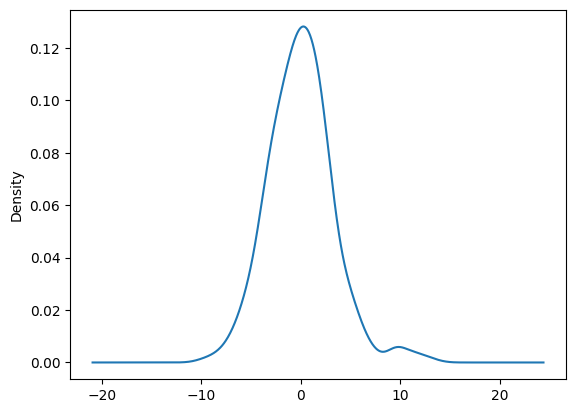

In [ ]:
model_multiple.resid.plot(kind="kde")

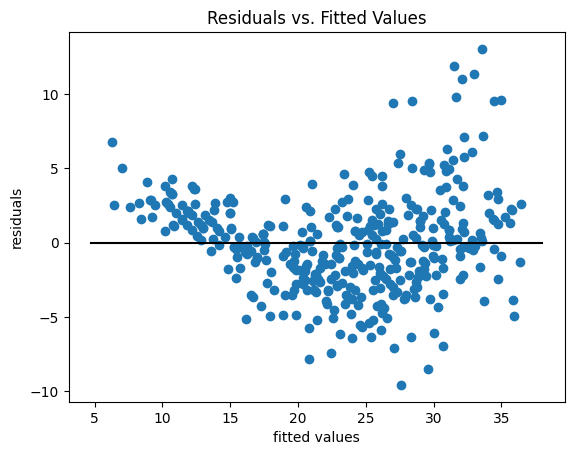

In [ ]:
fig, ax = plt.subplots()
ax.scatter(model_multiple.fittedvalues, model_multiple.resid)
ax.plot(ax.get_xlim(), [0, 0], color="black")
ax.set_title("Residuals vs. Fitted Values")
ax.set_xlabel("fitted values")
ax.set_ylabel("residuals")
plt.show()

<Axes: >

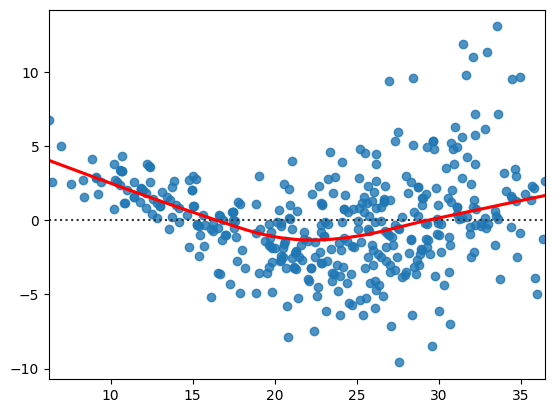

In [ ]:
sns.residplot(x=model_multiple.fittedvalues, y=model_multiple.resid, lowess=True, line_kws={"color": "red"})

### Evaluacion con los datos de testeo

In [45]:
y_pred = model_multiple.predict(X_test)

In [46]:
from sklearn import metrics
r_squared_test = metrics.r2_score(y_test, y_pred)
r_squared_test

0.5475557373867396

In [47]:
mape = metrics.mean_absolute_error(y_test, y_pred)
mape

3.808143406079216

In [53]:
auto["displacement"] * auto["weight"]
X_train

,const,acceleration,year,origin_2,origin_3
name,,,,,
dodge aspen,1.0,18.7,78.0,0.0,0.0
capri ii,1.0,14.9,76.0,0.0,0.0
ford pinto,1.0,14.5,75.0,0.0,0.0
plymouth fury iii,1.0,13.5,72.0,0.0,0.0
plymouth champ,1.0,16.4,81.0,0.0,0.0
...,...,...,...,...,...
amc matador (sw),1.0,12.5,72.0,0.0,0.0
amc gremlin,1.0,15.0,73.0,0.0,0.0
oldsmobile starfire sx,1.0,17.6,78.0,0.0,0.0


### Algunas interacciones


In [64]:
auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [5]:
valid_cols = ["acceleration", "year", "origin"]
valid_X = auto[valid_cols].copy()
valid_X["cylinders_displacement"] = auto["cylinders"] * auto["displacement"]
valid_X["cylinders_horsepower"] = auto["cylinders"] * auto["horsepower"]
valid_X["weight_cylinders"] = auto["weight"] * auto["cylinders"]
valid_X

,acceleration,year,origin,cylinders_displacement,cylinders_horsepower,weight_cylinders
name,,,,,,
chevrolet chevelle malibu,12.0,70,1,2456.0,1040,28032
buick skylark 320,11.5,70,1,2800.0,1320,29544
plymouth satellite,11.0,70,1,2544.0,1200,27488
amc rebel sst,12.0,70,1,2432.0,1200,27464
ford torino,10.5,70,1,2416.0,1120,27592
...,...,...,...,...,...,...
ford mustang gl,15.6,82,1,560.0,344,11160
vw pickup,24.6,82,2,388.0,208,8520
dodge rampage,11.6,82,1,540.0,336,9180


In [6]:
valid_X = pd.get_dummies(valid_X, columns=["origin"], drop_first=True)

In [7]:
valid_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   acceleration            392 non-null    float64
 1   year                    392 non-null    int64  
 2   cylinders_displacement  392 non-null    float64
 3   cylinders_horsepower    392 non-null    int64  
 4   weight_cylinders        392 non-null    int64  
 5   origin_2                392 non-null    bool   
 6   origin_3                392 non-null    bool   
dtypes: bool(2), float64(2), int64(3)
memory usage: 19.1+ KB


In [8]:
valid_X.origin_2 = valid_X.origin_2.astype(float)
valid_X.origin_3 = valid_X.origin_3.astype(float)

In [9]:
y = auto["mpg"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(valid_X, y, test_size=0.2, random_state=42)

In [11]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


In [13]:
# reentrenando el modelo

model_int_disp_weig = sm.OLS(y_train, X_train).fit()
print(model_int_disp_weig.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           3.36e-99
Time:                        01:30:53   Log-Likelihood:                -848.99
No. Observations:                 313   AIC:                             1714.
Df Residuals:                     305   BIC:                             1744.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -31